# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Giải thích từng phương pháp khởi tạo
+ Method 1: Chọn điểm đặc trưng ngẫu nhiên

Chọn ngẫu nhiên k điểm từ dữ liệu làm trung tâm ban đầu.
Nếu có hai điểm quá gần nhau, chọn lại (resample).
Đây là cách đơn giản nhưng có thể dẫn đến hội tụ chậm hoặc bị mắc kẹt trong cực tiểu cục bộ.
+ Method 2: Chọn các trọng tâm phân bố đều trong phạm vi dữ liệu

Thay vì chọn ngẫu nhiên, phương pháp này đảm bảo các trọng tâm phân bố đồng đều trong phạm vi dữ liệu.
Cách này giúp tránh việc tất cả các trọng tâm bị chọn tập trung vào một vùng dữ liệu nhỏ.
+ Method 3: Dùng K-Means trên một tập con của dữ liệu

Trước tiên, chạy thuật toán k-Means trên một tập con dữ liệu.
Sau đó, dùng kết quả này làm trọng tâm ban đầu cho thuật toán k-Means trên toàn bộ dữ liệu.
Cách này giúp thuật toán hội tụ nhanh hơn và cải thiện độ chính xác.

# Phân cụm K-Means

## Đề bài
- Cho một ảnh có N pixel và số cụm k.  
- Mục tiêu: Tìm ra k cụm trong ảnh.

## Quy trình phân cụm
1. **Chọn trọng tâm ban đầu**:  
   - Chọn ngẫu nhiên k điểm làm trung tâm cụm ban đầu: $ m_1, m_2, ..., m_k $ trong không gian đặc trưng.

2. **Gán pixel vào cụm gần nhất**:  
   - Với mỗi pixel $x_j$, tìm cụm có trung tâm $m_i$ gần nhất và gán pixel đó vào cụm i.

3. **Cập nhật trung tâm cụm**:  
   - Tính trung bình của tất cả các pixel trong từng cụm để cập nhật trung tâm mới.  

4. **Lặp lại cho đến khi hội tụ**:  
   - Nếu sự thay đổi của tất cả trung tâm cụm nhỏ hơn một ngưỡng $\epsilon$, thuật toán dừng lại. Ngược lại, quay lại bước 2.  


# Điểm cần chú ý khi thay đổi 
+ k=1: Toàn bộ ảnh sẽ có một màu duy nhất (trung bình tất cả các pixel).
+ k=2: Ảnh chỉ có 2 màu, làm mất nhiều chi tiết.
+ k=5: Chi tiết bắt đầu rõ hơn, nhưng vẫn đơn giản hóa màu sắc.
+ k=10: Màu sắc phong phú hơn, nhưng vẫn chưa hoàn toàn như ảnh gốc.
+ k=15,20: Gần giống ảnh gốc hơn nhưng vẫn có hiệu ứng phân cụm màu.

#  Kết quả mong đợi:
+ Khi k tăng, số lượng màu trong ảnh tăng lên, giúp giữ lại nhiều chi tiết hơn.
+ Khi k nhỏ, ảnh sẽ trông rất "đơn giản hóa" với các mảng màu lớn.

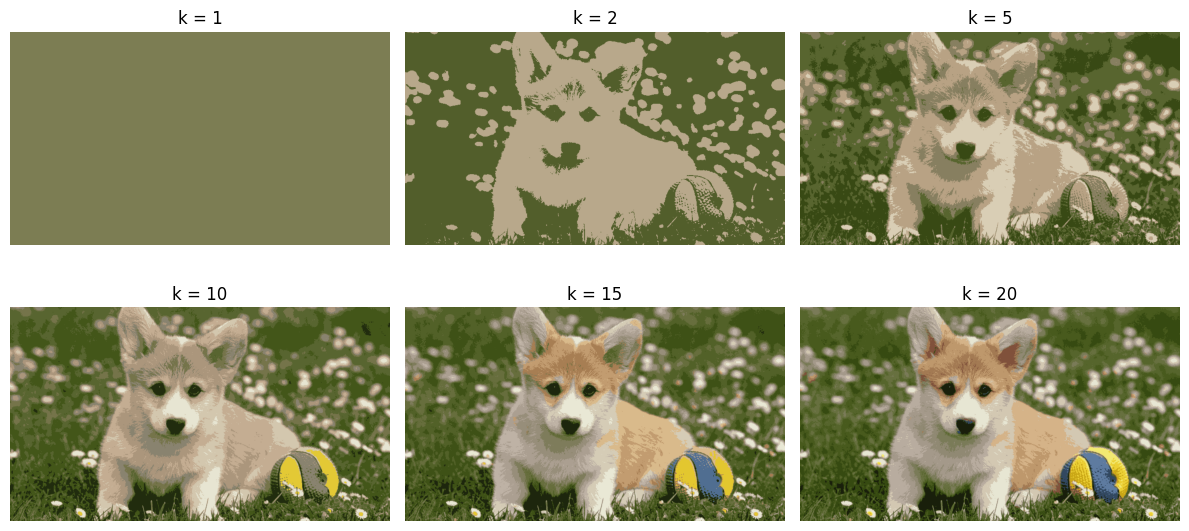

In [ ]:
# Đọc ảnh và chuyển sang không gian màu phù hợp
image = cv2.imread("Image/anh-con-cho-8.jpg")  # Thay bằng đường dẫn ảnh của bạn
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_vals = image.reshape((-1, 3))  # Chuyển về dạng vector 1D
pixel_vals = np.float32(pixel_vals)

# Thiết lập tiêu chí dừng của thuật toán K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# Nghĩa là thuật toán sẽ dừng nếu:
# Đã chạy 100 vòng lặp.
# Hoặc sự thay đổi trong trọng tâm nhỏ hơn 0.85.
# Danh sách các giá trị k để kiểm tra

k_values = [1, 2, 5, 10, 15, 20]

# Tạo biểu đồ so sánh kết quả
plt.figure(figsize=(12, 6))

for i, k in enumerate(k_values):
    _, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape))

    # Hiển thị kết quả
    plt.subplot(2, 3, i + 1)
    plt.imshow(segmented_image)
    plt.title(f"k = {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()